<a href="https://colab.research.google.com/github/vishal0820/Data-science-projects/blob/main/Data-science-projects/Zee_Recommender_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initializing necessary libraries
import numpy as np
import pandas as pd

# Handling warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Initializinf DF's
df_ratings = pd.read_csv("zee-ratings.dat", delimiter="::")
df_users = pd.read_csv('zee-users.dat', delimiter = '::')
df_movies = pd.read_csv("zee-movies.dat", delimiter = '::',encoding='ISO-8859-1')

In [ ]:
# Dtypes in Datasets
print(f'Datatypes in Ratings DF:\n{df_ratings.dtypes}')
print(f'\nDatatypes in Users DF:\n{df_users.dtypes}')
print(f'\nDatatypes in Movies DF:\n{df_movies.dtypes}')

Datatypes in Ratings DF:
UserID       int64
MovieID      int64
Rating       int64
Timestamp    int64
dtype: object

Datatypes in Users DF:
UserID         int64
Gender        object
Age            int64
Occupation     int64
Zip-code      object
dtype: object

Datatypes in Movies DF:
Movie ID     int64
Title       object
Genres      object
dtype: object


In [ ]:
# Duplicates in Datasets
print(f'Duplicates in Ratings DF: {df_ratings.duplicated().sum()}')
print(f'Duplicates in Users DF: {df_users.duplicated().sum()}')
print(f'Duplicates in Movies DF: {df_movies.duplicated().sum()}')

Duplicates in Ratings DF: 0
Duplicates in Users DF: 0
Duplicates in Movies DF: 0


Data Preparation

In [ ]:
# Renaming Columns to maintain consistency
df_movies.rename(columns = {'Movie ID':'MovieID'}, inplace = True)

In [ ]:
df_merged = pd.merge(left = df_ratings, right = df_movies, on = "MovieID", how = "left")
df_merged = pd.merge(left = df_merged, right = df_users, on = 'UserID', how = 'left')
df_merged.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [ ]:
# Extracting Years

import re

def get_year(title):
    year = re.search('\(\d*\)', title)
    return year[0][1:5]

df_merged['Year'] = df_merged['Title'].map(get_year)

In [ ]:
# Cleaning Title
def clean_title(title):
    year = re.search('\(\d*\)', title)[0]
    title =  re.search('.*\(\d\d\d\d\)', title)[0][:-6]

    parts = title.split(', ')
    if len(parts) == 2 and parts[1].lower().strip() in ["the", "a", "an"]:
        title = parts[1] + " " + parts[0]
    return title + " " + year

# Apply the function to the 'Title' column
df_merged['Title'] = df_merged['Title'].map(clean_title)

In [ ]:
# Handling Timestamp
df_merged['Timestamp'] = pd.to_datetime(df_merged['Timestamp'], unit = 's')

In [ ]:
# Extractng Rating Year, Month, Date
df_merged['RatingDate'] = df_merged['Timestamp'].dt.day
df_merged['RatingMonth'] = df_merged['Timestamp'].dt.month
df_merged['RatingYear'] = df_merged['Timestamp'].dt.year

# Dropping Timestamp
df_merged.drop(columns=['Timestamp'], inplace = True)

In [ ]:
# Dataset Shape
df_merged.shape

(1000209, 13)

In [ ]:
# Dataset Nan's
df_merged.isna().sum()

,0
UserID,0
MovieID,0
Rating,0
Title,0
Genres,0
Gender,0
Age,0
Occupation,0
Zip-code,0
Year,0


In [ ]:
# DataTypes
df_merged.dtypes

,0
UserID,int64
MovieID,int64
Rating,int64
Title,object
Genres,object
Gender,object
Age,int64
Occupation,int64
Zip-code,object
Year,object


In [ ]:
# Handling Zipcodes
df_merged[~df_merged['Zip-code'].str.isnumeric()].head()

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation,Zip-code,Year,RatingDate,RatingMonth,RatingYear
21847,161,2988,4,Melvin and Howard (1980),Drama,M,45,16,98107-2117,1980,19,12,2000
21848,161,1179,4,The Grifters (1990),Crime|Drama|Film-Noir,M,45,16,98107-2117,1990,19,12,2000
21849,161,3860,4,The Opportunists (1999),Crime,M,45,16,98107-2117,1999,19,12,2000
21850,161,1252,5,Chinatown (1974),Film-Noir|Mystery|Thriller,M,45,16,98107-2117,1974,19,12,2000
21851,161,1253,5,The Day the Earth Stood Still (1951),Drama|Sci-Fi,M,45,16,98107-2117,1951,19,12,2000


These Zip Codes follow US Standards where digits after - describe exact locations, Let's handle this by imputing them to traditional

In [ ]:
def get_zipcode(zip):
    code = re.search('^\d*-', zip)
    if code:
        return code[0][:-1]
    else:
        return zip

df_merged['Zip-code'] = df_merged['Zip-code'].map(get_zipcode)

# Handling Zip Code Datatype
df_merged['Zip-code'] = df_merged['Zip-code'].astype(int)

In [ ]:
# Handling Data Types
df_merged['Year'] = df_merged['Year'].astype('int')

In [ ]:
# Handling Genres
df_merged['Genres'] = df_merged['Genres'].str.split('|')
df_exploded = df_merged.explode('Genres')

# Rejoining Genres
df_merged['Genres'] = df_merged['Genres'].apply(lambda x : ', '.join(x))

We have not removed year from Movie Title, because many movies in the dataset are observed with same name, Without year it is difficult to analyze

**Data** **`Visualization`**

In [ ]:
# Importing Necessary Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Setting Parametes
sns.set(style = "darkgrid", palette = "deep")

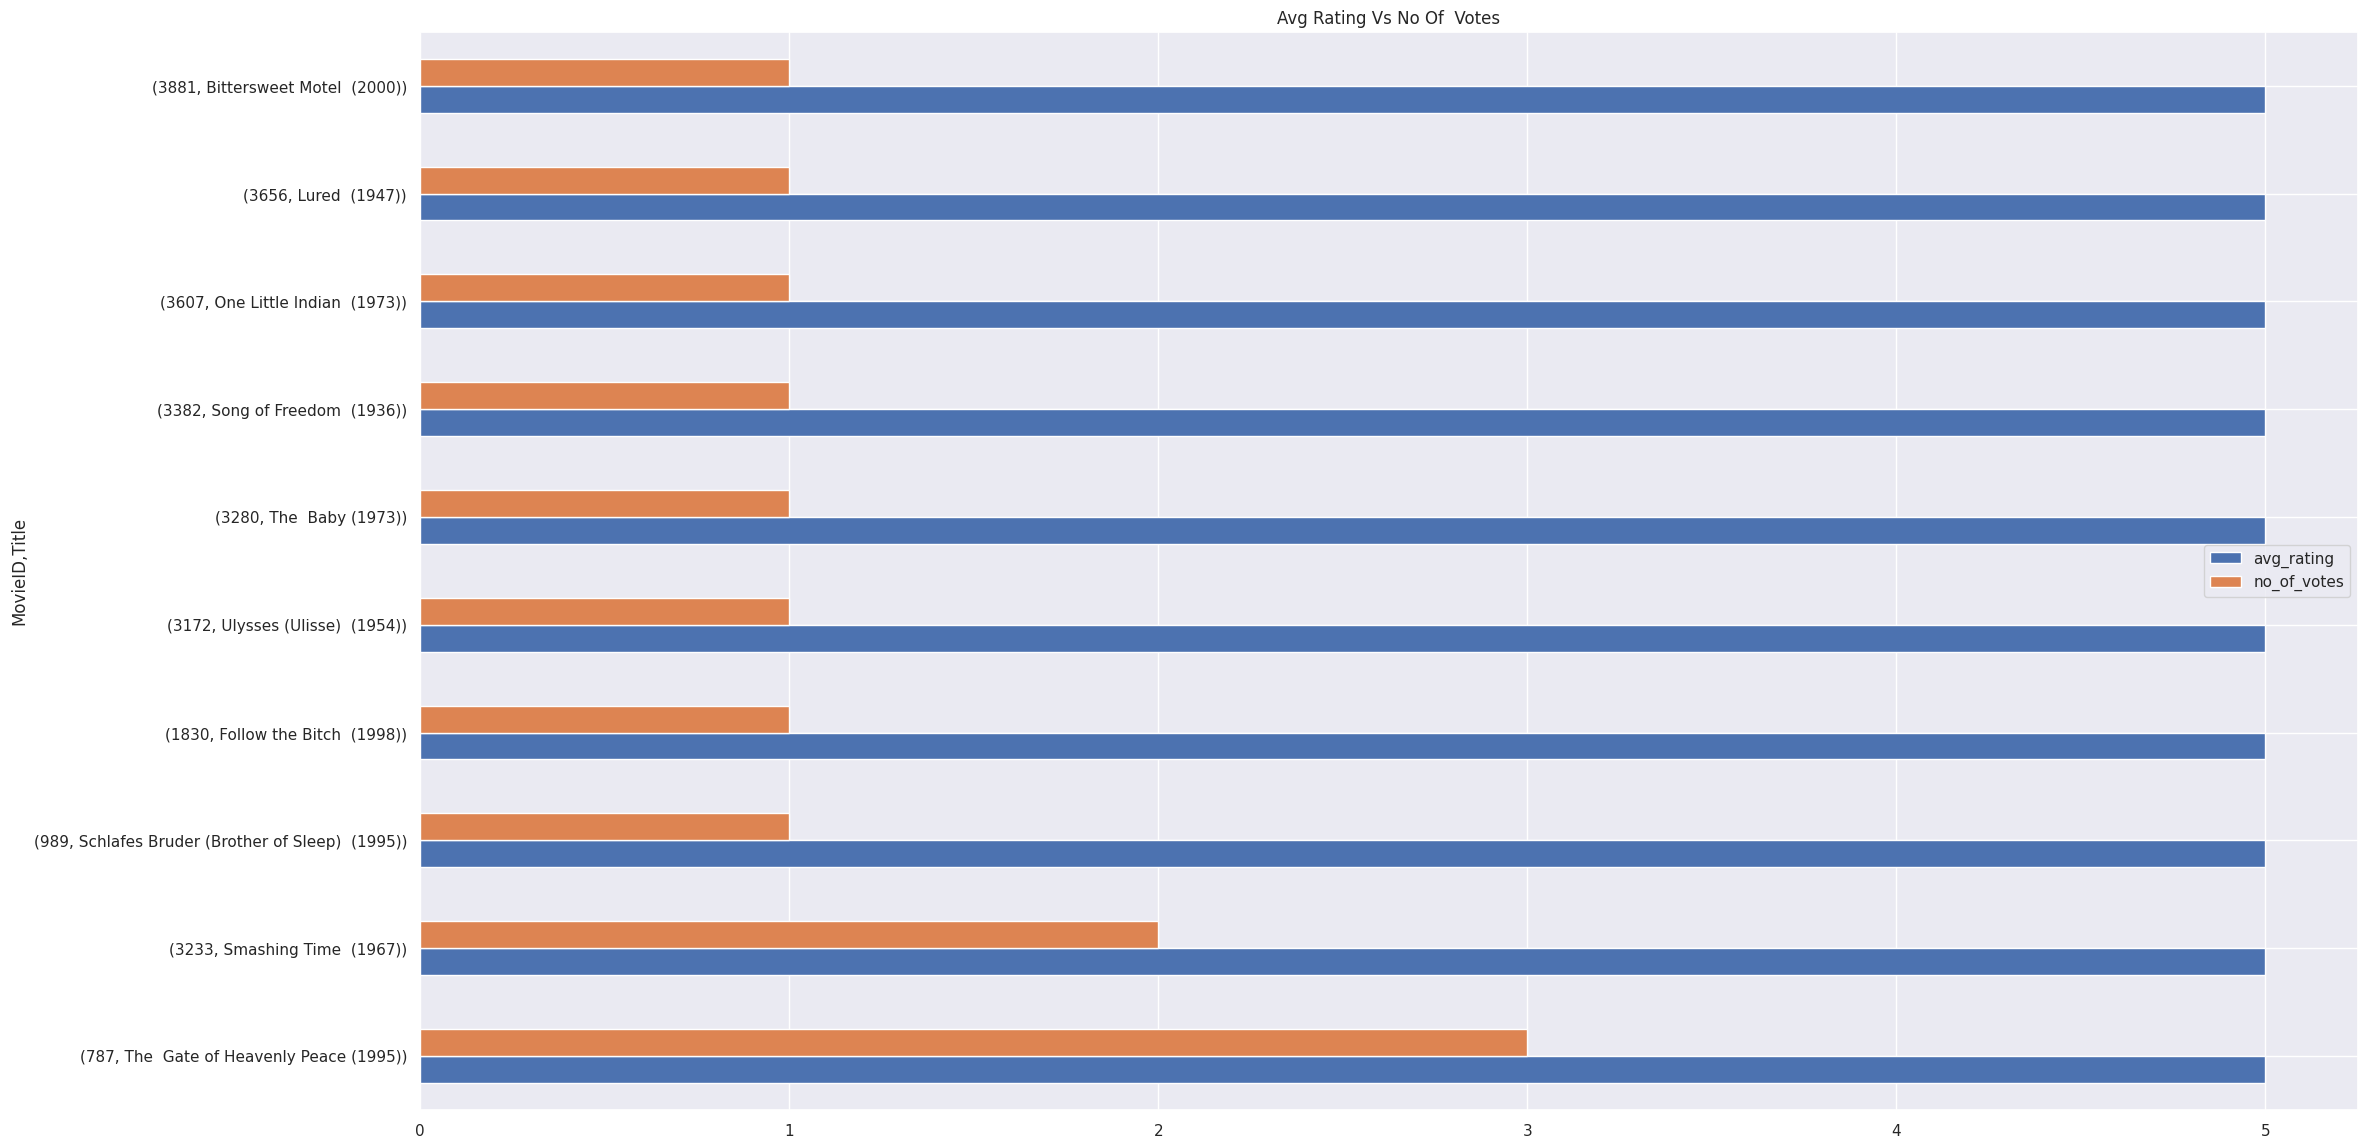

In [ ]:
# Grouping data on Number of Votes and Average Rating
df_grouped = df_merged.groupby(['MovieID', 'Title'])['Rating'].agg(avg_rating = 'mean', no_of_votes = 'count')
df_grouped.sort_values(by = ['avg_rating', 'no_of_votes'], ascending = [False, False])[:10].plot(kind='barh',
                        title = "Avg Rating Vs No Of  Votes", figsize = (25,14))
plt.show()

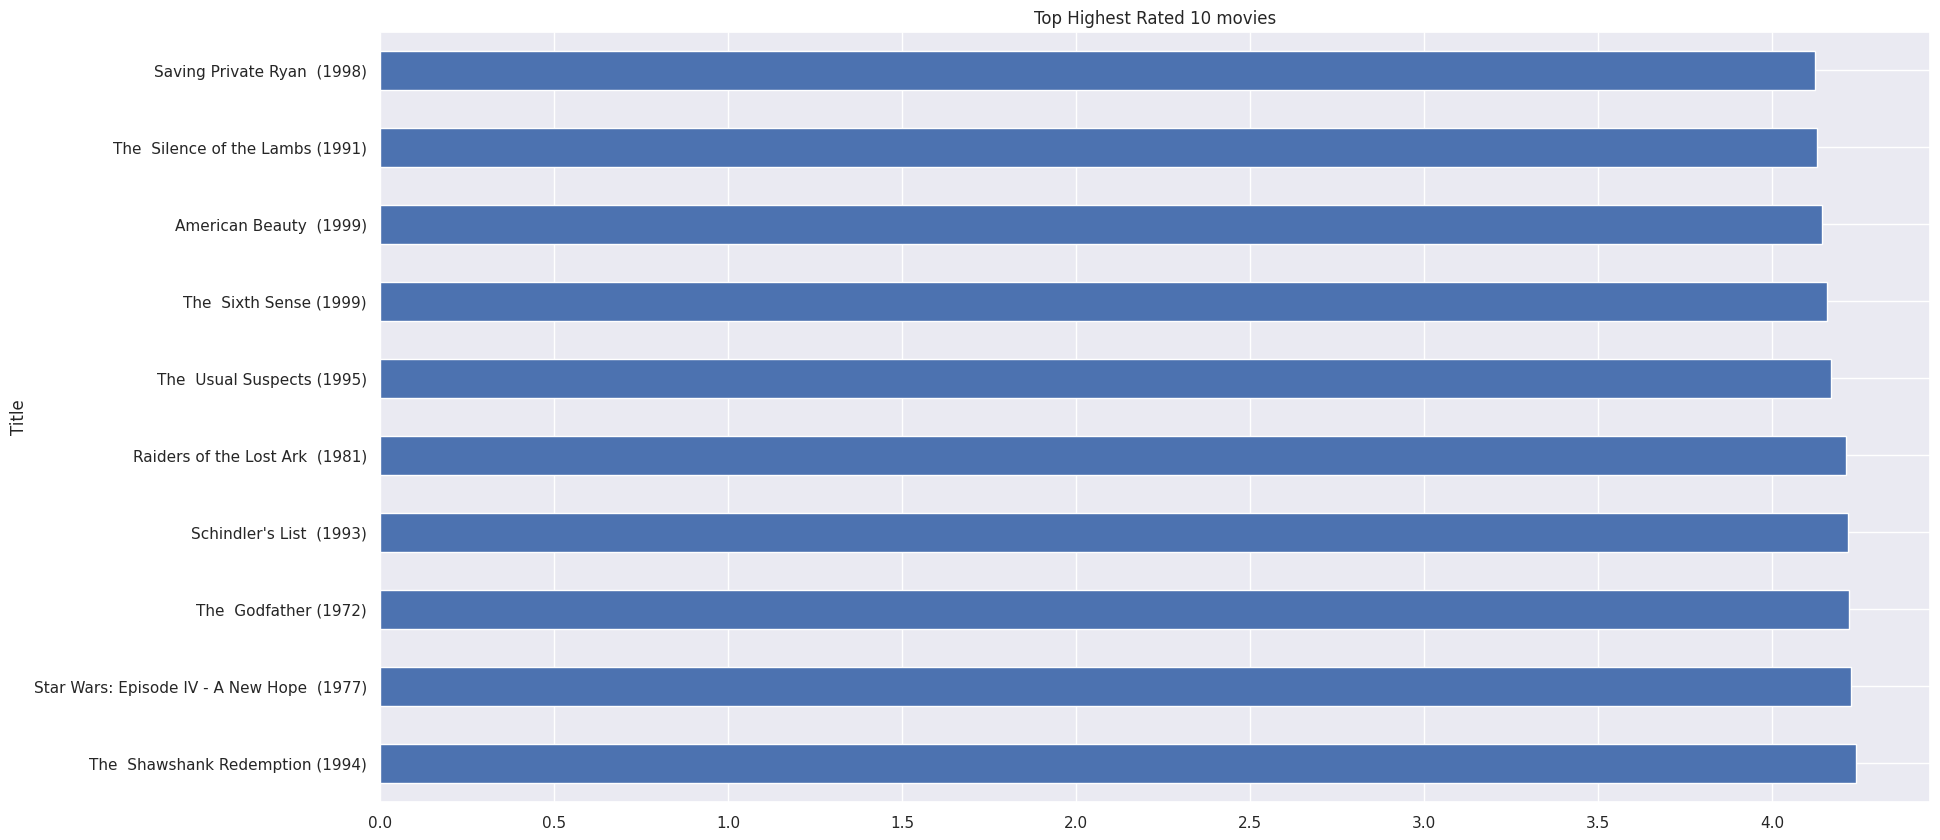

In [ ]:
# Top Highest Rated movies According to ratio of number of votes
C = df_merged['Rating'].mean()
m = df_merged.groupby('Title')['Rating'].count().quantile(0.95)
v = df_merged.groupby('Title')['Rating'].count()
R = df_merged.groupby('Title')['Rating'].mean()
WR = (v/(v+m))*R + (m/(v+m))*C

WR.sort_values(ascending=False)[:10].plot(kind = 'barh', figsize=(20,10))
plt.title("Top Highest Rated 10 movies")
plt.show()

Above method is not robust enough to draw Higher Sense in Analysis. We will find High rated movies on the basis of Bayesian Weighted Ratio
Weighted Rating
=
(
v
v
+
m
⋅
)
R
+
(
m
v
+
m
)
⋅
C


v
  is the number of the votes
m
  is the minimum votes required to be listed
R
  is the average rating for the movie
C
  is the mean vote across the whole report.

Top Rated Movies according Bayesian Weighted ratio: The Shawshank Redemption.







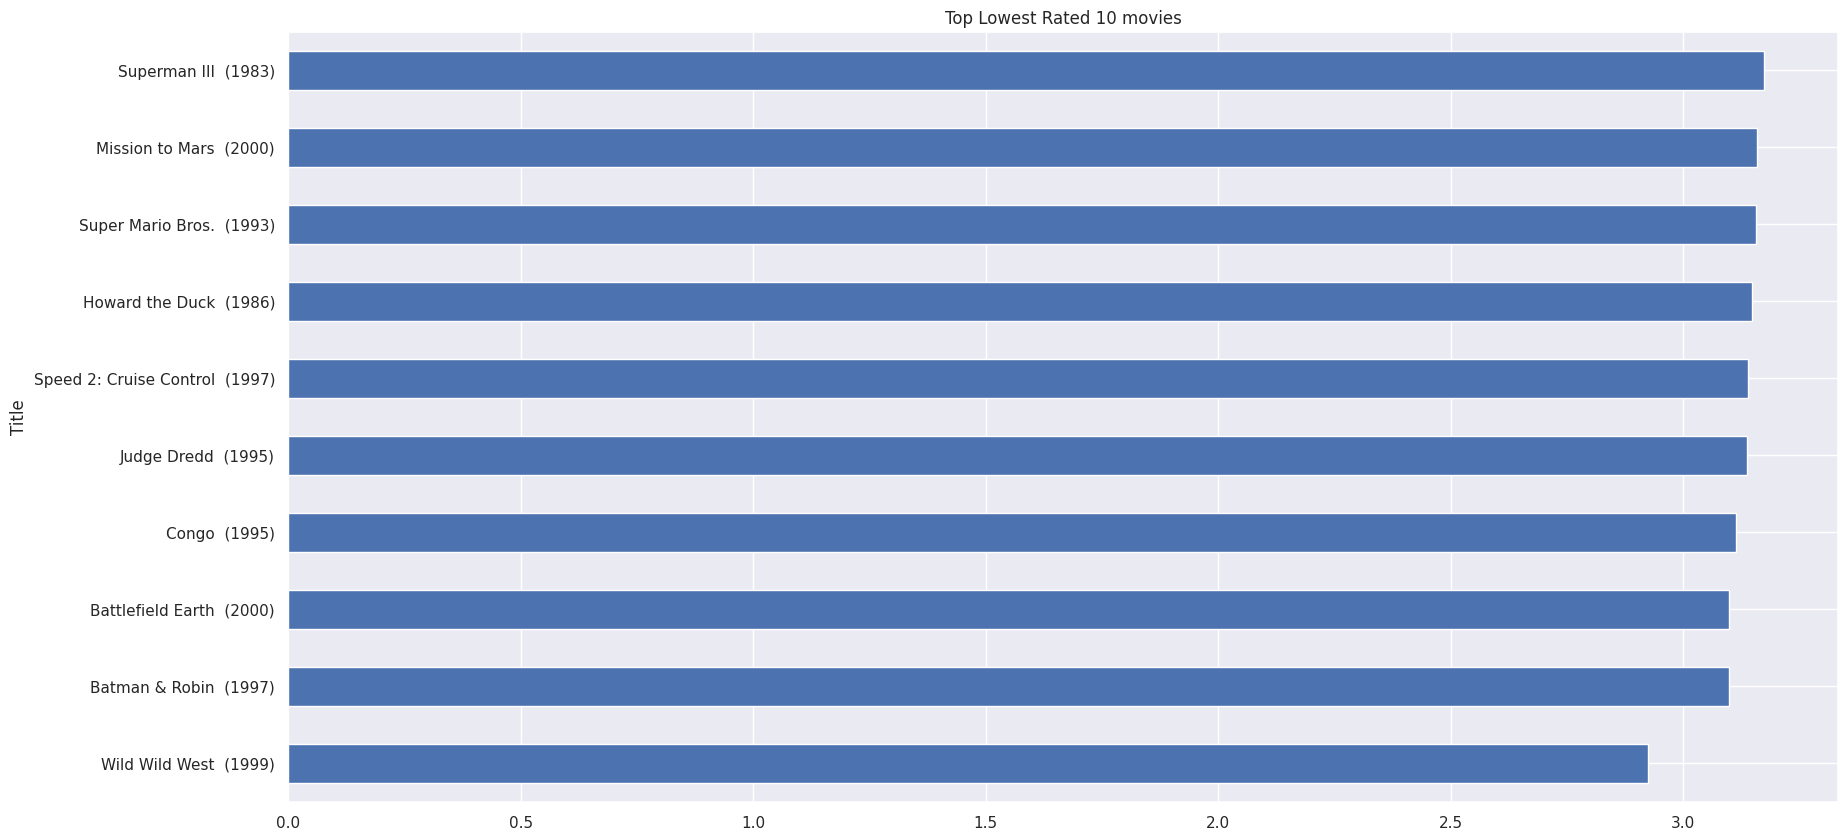

In [ ]:
# Top Lowest Rated movies According to ratio of number of votes
WR.sort_values(ascending=True)[:10].plot(kind = 'barh', figsize=(20 ,10))
plt.title("Top Lowest Rated 10 movies")
plt.show()

Lowest Rated movie according to Bayesian Weighted Ratio: Wild Wild West

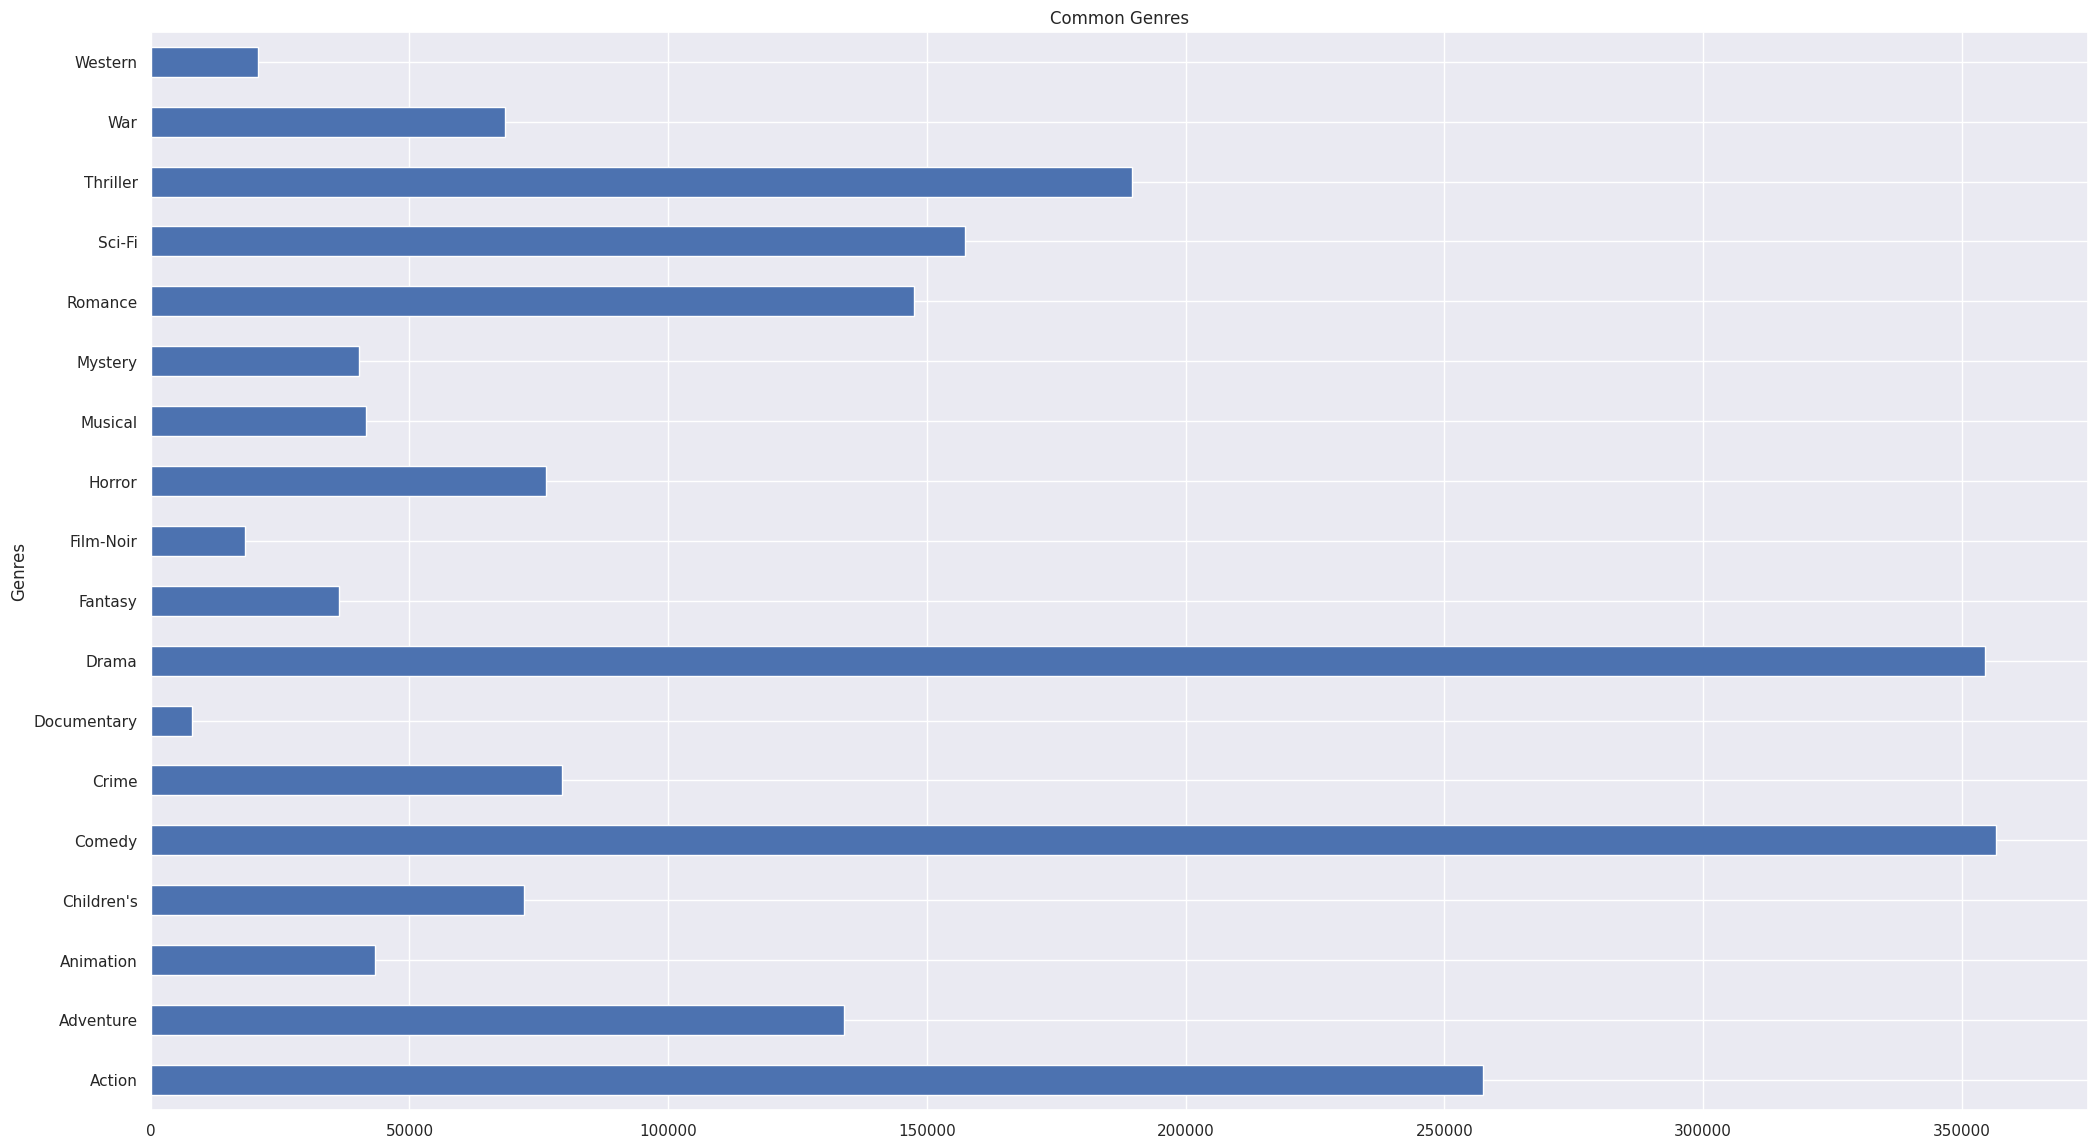

In [ ]:
# Common Genres Movies
df_exploded.groupby('Genres').size().plot(kind = 'barh', figsize=(25,14), title='Common Genres')
plt.show()

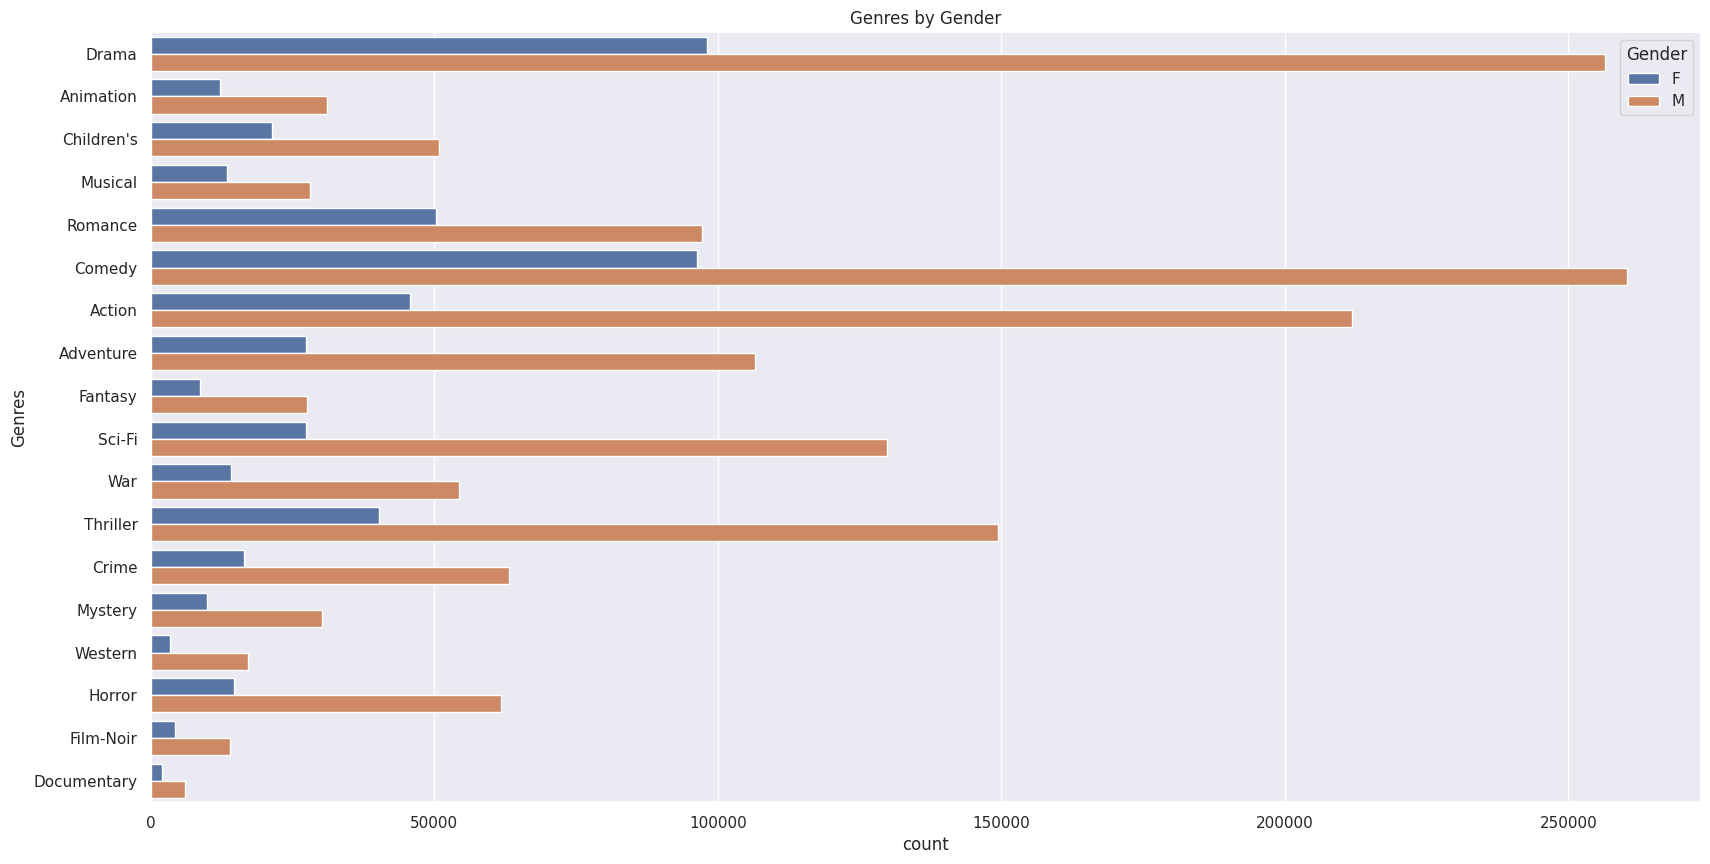

In [ ]:
# Genres watched acccording to Gender
plt.figure(figsize=(20,10))
plt.title('Genres by Gender')
sns.countplot(data = df_exploded, y = 'Genres', hue='Gender')
plt.show()




*   Drama and Comedy is most popular genre among both gendres
*   While Action is highly preferred by Males







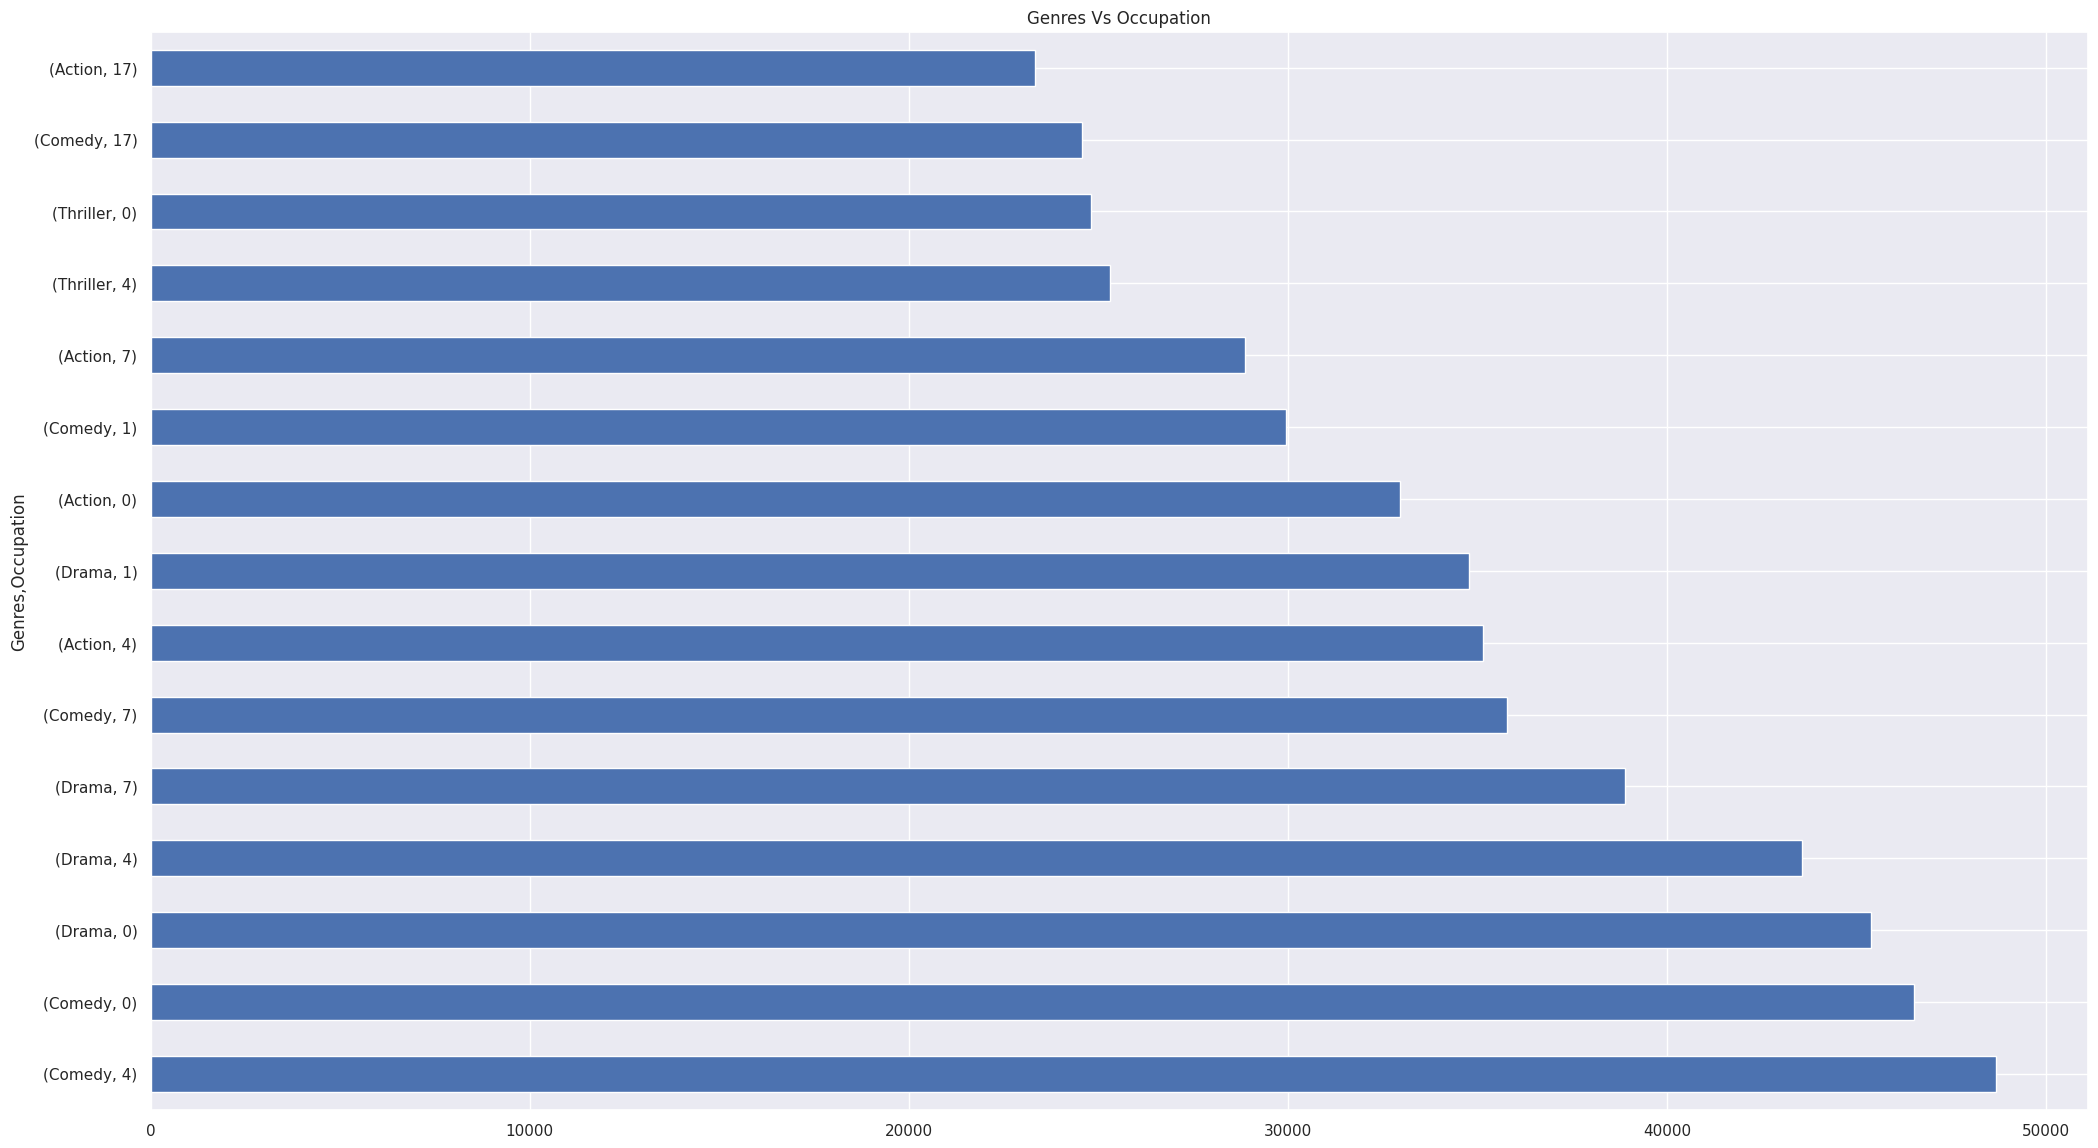

In [ ]:
# Top 15 Genres Watched according to profesison
df_exploded.groupby(['Genres', 'Occupation']).size().sort_values(ascending=False)[:15
                ].plot(kind = 'barh', figsize=(25,14), title='Genres Vs Occupation')
plt.show()

*   Most viewers are College Grad student watching Comedy



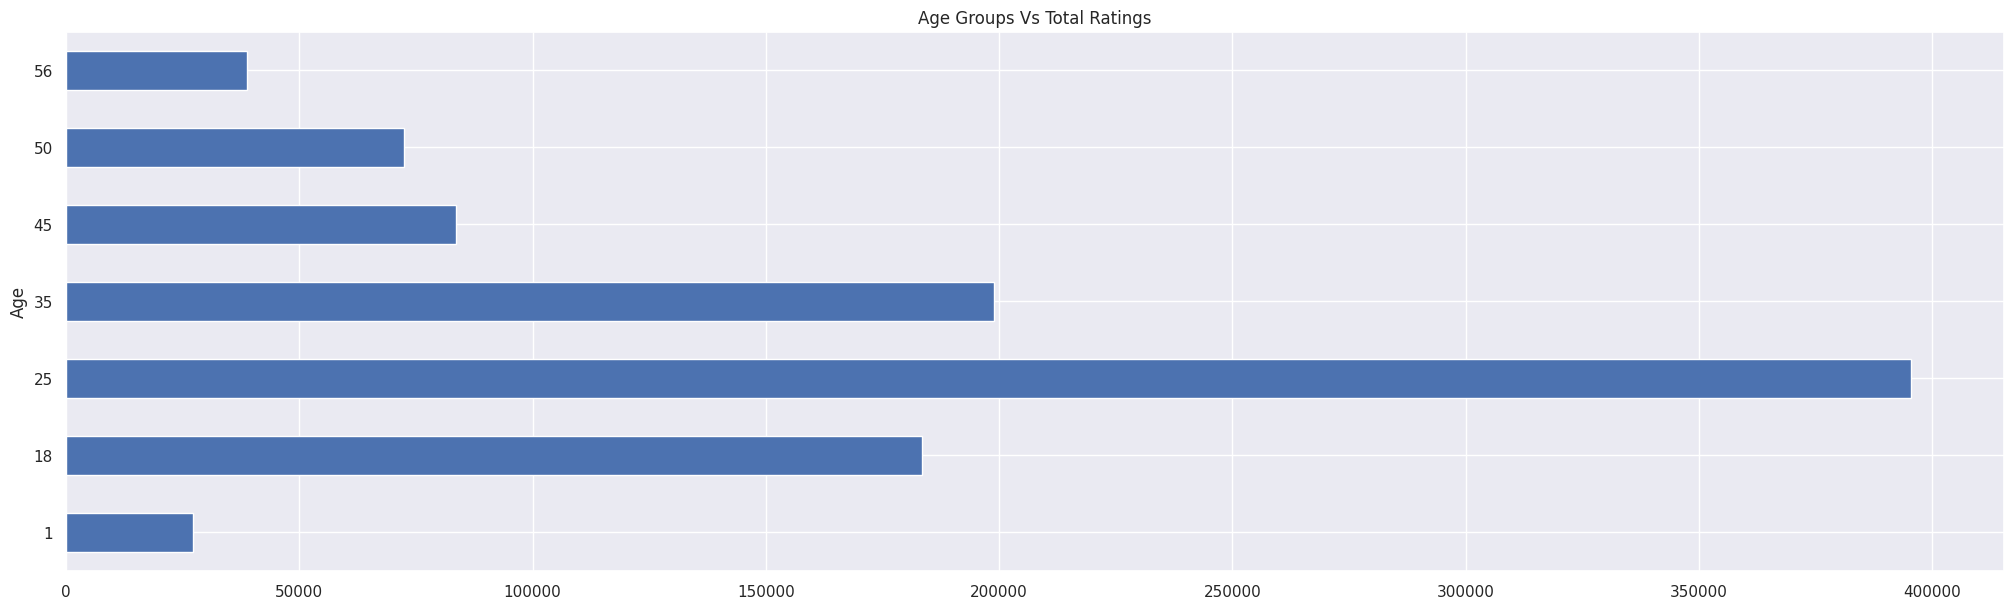

In [ ]:
df_merged.groupby("Age")['Rating'].count().plot(kind='barh',figsize=(25,7), title='Age Groups Vs Total Ratings')
plt.show()



*   Age group of "25-34" have watched and rated most movies




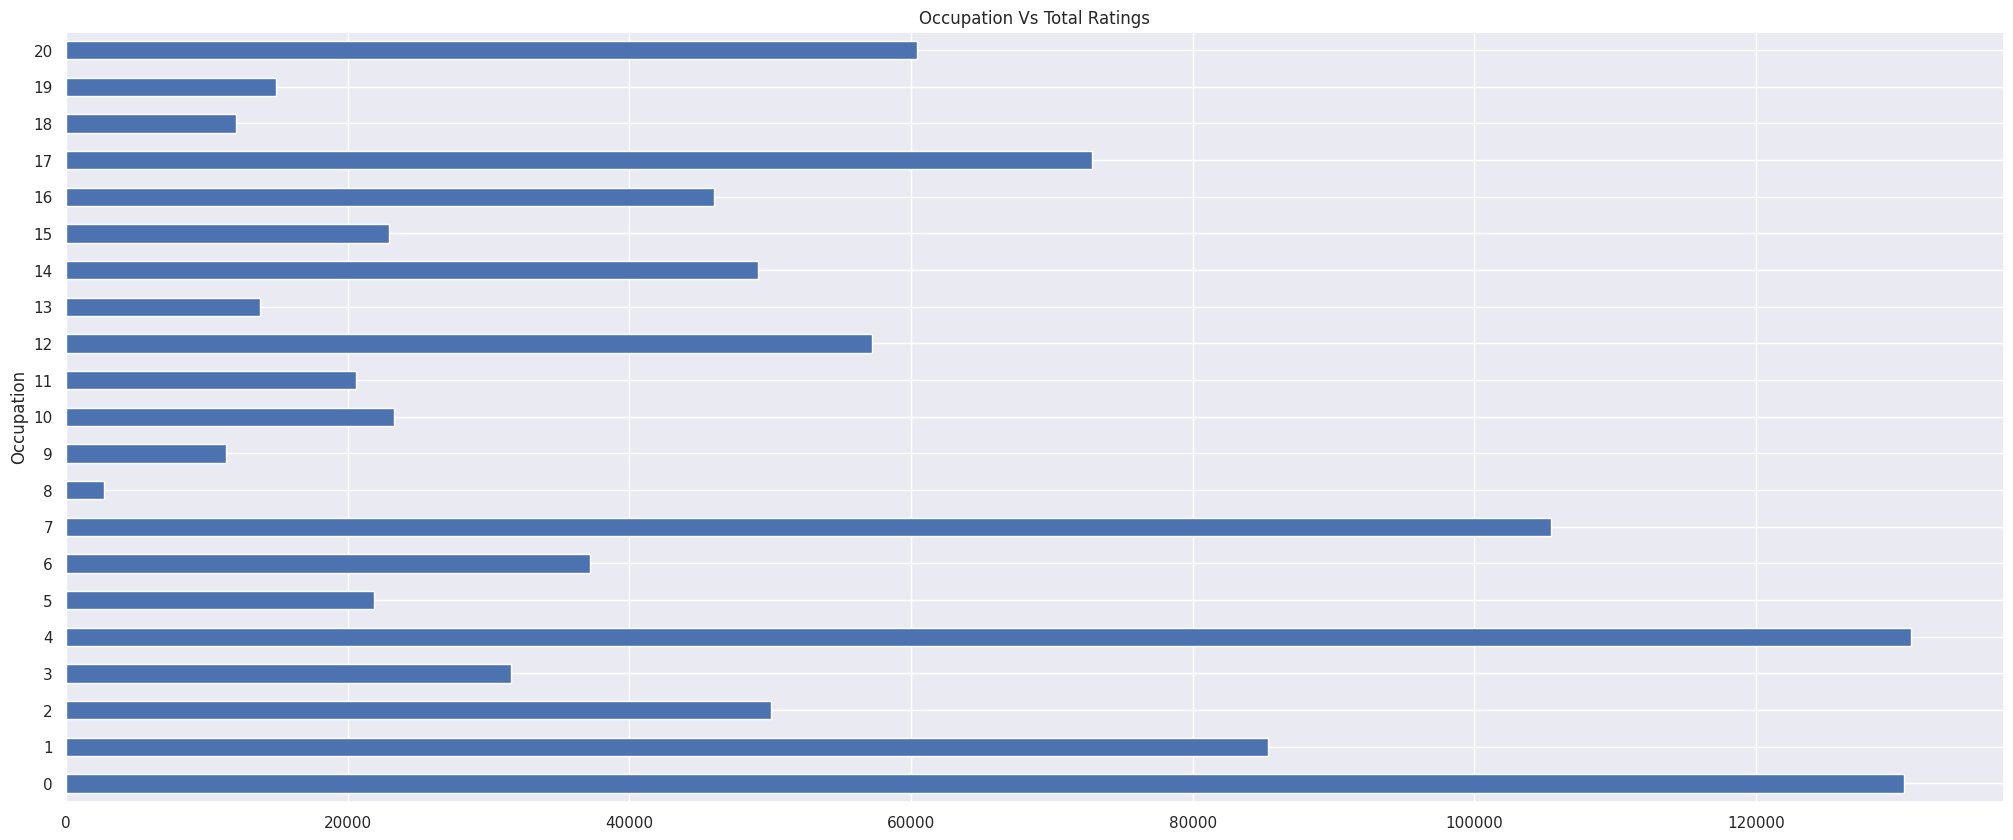

In [ ]:
df_merged.groupby("Occupation")['Rating'].count().plot(kind='barh',figsize=(25,10), title='Occupation Vs Total Ratings')
plt.show()



*   User beong to Others or College/Grad Student have watched and rated most movies




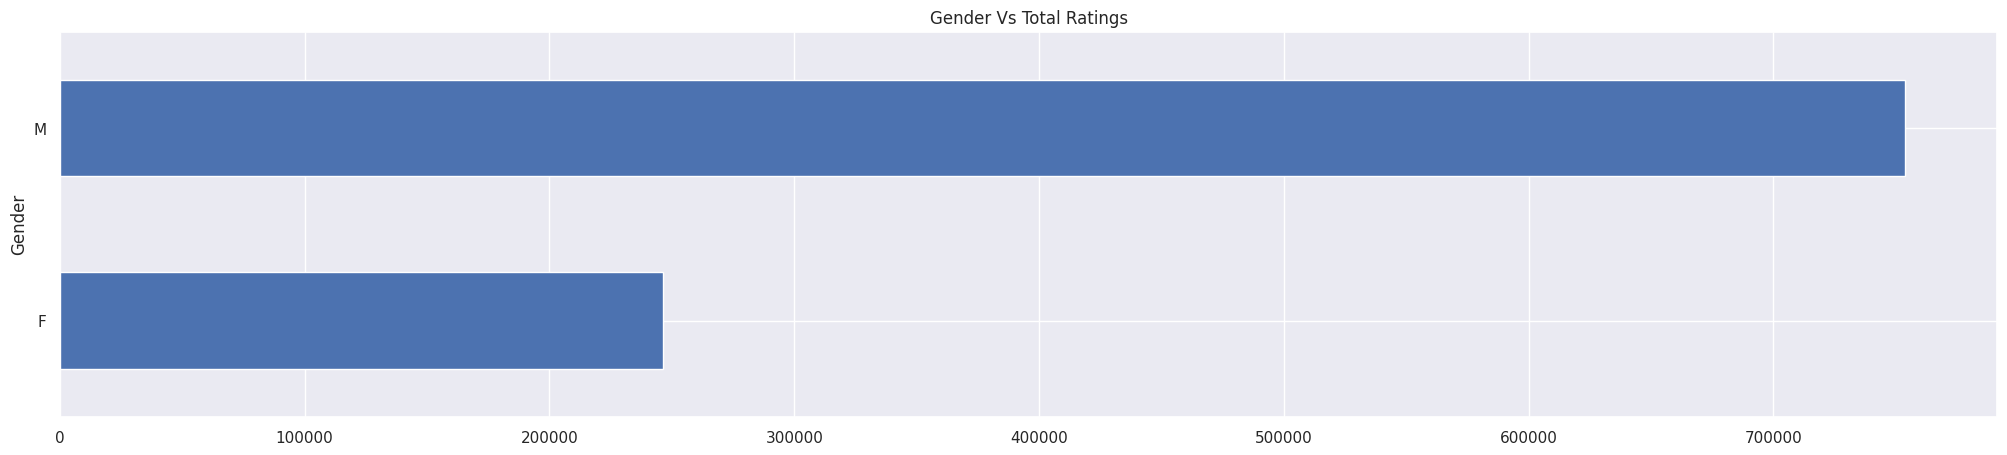

In [ ]:
df_merged.groupby("Gender")['Rating'].count().plot(kind='barh',figsize=(25,5), title='Gender Vs Total Ratings')
plt.show()



*   Most of the movies are watched and rated by males




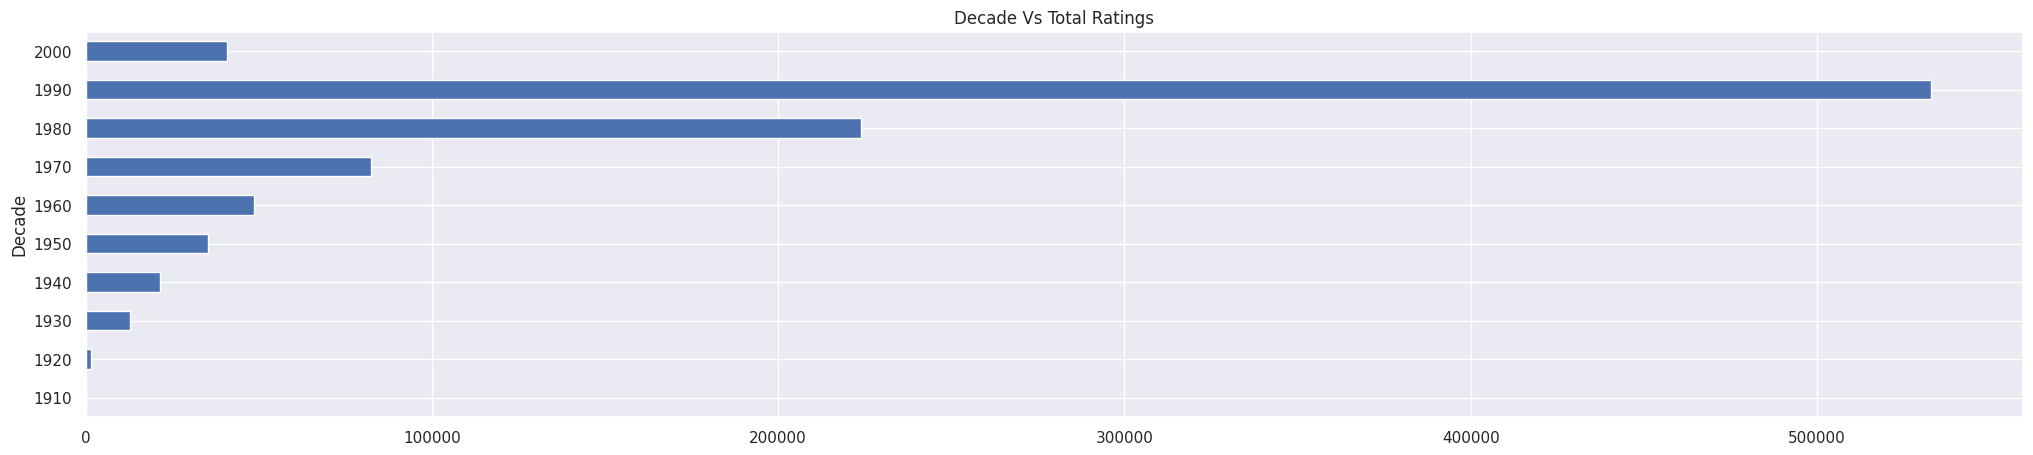

In [ ]:
df_decade = df_merged.copy()
df_decade['Decade'] = (df_decade['Year']//10)*10
df_decade.groupby("Decade")['Rating'].count().plot(kind='barh',figsize=(25,5), title='Decade Vs Total Ratings')
plt.show()



*   Most of the movies were released in 90's




In [ ]:
# Maximum No of Ratings
df_merged.groupby('Title')['Rating'].count().sort_values(ascending=False)[:1]

,Rating
Title,
American Beauty (1999),3428




*   American Beauty has highest No of Ratings




**Modeling**

Pearson Correlation Model

In [ ]:
df_pivot = df_merged.pivot(index = 'UserID', columns = 'Title', values = 'Rating')

In [ ]:
# Fiilling NaN'

"""
Strategy to fill Nan's
=======================

1: We ll first find popular 100 movies according to Bayesian Weighted Rating( on a scale of 5)
2: We'll impute them for missing values
3: For all the rest we ll assign 0

This helps tp handle sparsity of the matrix
"""

# Calculating Bayesian Weighted Average
C = df_merged['Rating'].mean()
m = df_merged.groupby('Title')['Rating'].count().quantile(0.95)
v = df_merged.groupby('Title')['Rating'].count()
R = df_merged.groupby('Title')['Rating'].mean()
WR = (v/(v+m))*R + (m/(v+m))*C
WR.sort_values(ascending=False, inplace=True)

# Filling NaN's
for movie in df_pivot.columns:
    if movie in WR.index:
        df_pivot[movie].fillna(WR.loc[movie], inplace=True)

In [ ]:
# Item Similarity
item_similarity_df =  df_pivot.corr(method = 'pearson')

In [ ]:
# Recommending similar items
def get_similar_movies(movie_title):
    similar_score = item_similarity_df.loc[movie_title].sort_values(ascending=False)
    return similar_score.loc[similar_score.index!=movie_title]

get_similar_movies('The  Godfather (1972)')[:5]

,The Godfather (1972)
Title,
The Godfather: Part II (1974),0.516513
GoodFellas (1990),0.203953
The French Connection (1971),0.189927
Apocalypse Now (1979),0.185310
Taxi Driver (1976),0.177674


In [ ]:
get_similar_movies('Liar Liar  (1997)')[:3]

,Liar Liar (1997)
Title,
Ace Ventura: Pet Detective (1994),0.243070
Dumb & Dumber (1994),0.234485
Mrs. Doubtfire (1993),0.214544




*   Ace Ventura: Pet Detective, Dumb & Dumber, Mrs. Doubtfire are the most similar movies to Liar Liar




In [ ]:
# Pearson User Similarity
user_similarity_df =  df_pivot.T.corr(method = 'pearson')

In [ ]:
# Recommending similar Users
def get_similar_movies(user_id):
    similar_score = user_similarity_df.loc[user_id].sort_values(ascending=False)
    return similar_score.loc[similar_score.index!=user_id][:10]

get_similar_movies(1)

,1
UserID,
907,0.776638
4628,0.764756
1336,0.761432
4159,0.758711
4073,0.758522
2388,0.756300
2538,0.749028
3739,0.744752
1454,0.743017


Cosine Similarity

In [ ]:
df_pivot

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),...,Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,3.562715,3.568449,3.53966,3.602571,3.579511,3.518136,3.586771,3.444023,3.845286,3.540005,...,3.524645,3.406558,3.530944,3.578912,3.562271,3.58141,3.619235,3.58141,3.558879,3.49026
2,3.562715,3.568449,3.53966,3.602571,3.579511,3.518136,3.586771,3.444023,3.845286,3.540005,...,3.524645,3.406558,3.530944,3.578912,3.562271,3.58141,3.619235,3.58141,3.558879,3.49026
3,3.562715,3.568449,3.53966,3.602571,3.579511,3.518136,3.586771,3.444023,3.845286,3.540005,...,5.000000,4.000000,3.530944,3.578912,3.562271,3.58141,3.619235,3.58141,3.558879,3.49026
4,3.562715,3.568449,3.53966,3.602571,3.579511,3.518136,3.586771,3.444023,3.845286,3.540005,...,3.524645,3.406558,3.530944,3.578912,3.562271,3.58141,3.619235,3.58141,3.558879,3.49026
5,3.562715,3.568449,3.53966,3.602571,3.579511,3.518136,3.586771,3.444023,3.845286,3.540005,...,3.524645,3.406558,3.530944,3.578912,3.562271,3.58141,3.619235,3.58141,3.558879,3.49026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,3.562715,3.000000,3.53966,3.602571,3.579511,2.000000,4.000000,3.444023,3.845286,3.540005,...,3.524645,3.406558,3.000000,3.578912,3.562271,3.58141,3.619235,3.58141,3.558879,2.00000
6037,3.562715,3.568449,3.53966,3.602571,3.579511,3.518136,3.586771,3.444023,4.000000,3.540005,...,3.524645,3.406558,3.530944,3.578912,3.562271,3.58141,3.619235,3.58141,3.558879,3.49026
6038,3.562715,3.568449,3.53966,3.602571,3.579511,3.518136,3.586771,3.444023,3.845286,3.540005,...,3.524645,3.406558,3.530944,3.578912,3.562271,3.58141,3.619235,3.58141,3.558879,3.49026


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Create Cosine Similar matrix
item_similarity_df = pd.DataFrame(cosine_similarity(df_pivot.T), index = df_pivot.columns , columns = df_pivot.columns)
user_similarity_df = pd.DataFrame(cosine_similarity(df_pivot), index = df_pivot.index , columns = df_pivot.index)

In [ ]:
# Item-Item Cosine Matrix
display(item_similarity_df)

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),...,Young Guns (1988),Young Guns II (1990),Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.999073,0.999067,0.998657,0.999632,0.994960,0.996346,0.996193,0.996648,0.999017,...,0.995802,0.995959,0.997592,0.999554,0.998712,0.999621,0.997560,0.999647,0.999325,0.995586
'Night Mother (1986),0.999073,1.000000,0.998797,0.998495,0.999403,0.994878,0.996011,0.995903,0.996654,0.998775,...,0.995551,0.995733,0.997348,0.999326,0.998498,0.999392,0.997357,0.999418,0.999078,0.995417
'Til There Was You (1997),0.999067,0.998797,1.000000,0.998430,0.999396,0.994806,0.996059,0.996158,0.996605,0.998800,...,0.995505,0.995772,0.997405,0.999306,0.998553,0.999374,0.997345,0.999400,0.999093,0.995465
...And Justice for All (1979),0.998657,0.998495,0.998430,1.000000,0.998996,0.994480,0.995668,0.995471,0.996444,0.998409,...,0.995066,0.995375,0.997013,0.998969,0.998129,0.998985,0.997014,0.999019,0.998673,0.995004
1-900 (1994),0.999632,0.999403,0.999396,0.998996,1.000000,0.995367,0.996501,0.996516,0.997161,0.999357,...,0.996074,0.996304,0.997938,0.999886,0.999059,0.999953,0.997902,0.999978,0.999639,0.995934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zachariah (1971),0.999621,0.999392,0.999374,0.998985,0.999953,0.995356,0.996490,0.996506,0.997149,0.999342,...,0.996042,0.996306,0.997927,0.999875,0.999049,1.000000,0.997892,0.999968,0.999628,0.995956
Zero Effect (1998),0.997560,0.997357,0.997345,0.997014,0.997902,0.993547,0.994586,0.994372,0.995204,0.997248,...,0.994275,0.994286,0.995934,0.997927,0.997026,0.997892,1.000000,0.997925,0.997597,0.994402
Zero Kelvin (Kjærlighetens kjøtere) (1995),0.999647,0.999418,0.999400,0.999019,0.999978,0.995382,0.996518,0.996531,0.997181,0.999368,...,0.996092,0.996318,0.997955,0.999901,0.999075,0.999968,0.997925,1.000000,0.999654,0.995984


In [ ]:
# User-User Cosine Matrix
display(user_similarity_df)

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.998529,0.999140,0.999407,0.996507,0.999141,0.999399,0.998539,0.999139,0.996154,...,0.998567,0.998549,0.999231,0.999465,0.991162,0.990504,0.998194,0.999399,0.999010,0.995106
2,0.998529,1.000000,0.998362,0.998605,0.995586,0.998214,0.998625,0.997568,0.998289,0.995198,...,0.997708,0.997694,0.998483,0.998651,0.990439,0.989994,0.997485,0.998567,0.998260,0.994186
3,0.999140,0.998362,1.000000,0.999277,0.996410,0.998898,0.999261,0.998270,0.998903,0.995843,...,0.998377,0.998393,0.999016,0.999323,0.991050,0.990390,0.998039,0.999284,0.998896,0.994837
4,0.999407,0.998605,0.999277,1.000000,0.996674,0.999153,0.999452,0.998623,0.999173,0.996005,...,0.998633,0.998598,0.999308,0.999566,0.991181,0.990760,0.998321,0.999450,0.999102,0.995266
5,0.996507,0.995586,0.996410,0.996674,1.000000,0.996350,0.996567,0.995714,0.996247,0.993246,...,0.995927,0.995871,0.996468,0.996810,0.988823,0.987999,0.995433,0.996710,0.996368,0.992729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.990504,0.989994,0.990390,0.990760,0.987999,0.990155,0.990510,0.989780,0.990180,0.986901,...,0.989696,0.990025,0.990396,0.990790,0.983665,1.000000,0.989427,0.990541,0.990331,0.987190
6037,0.998194,0.997485,0.998039,0.998321,0.995433,0.997931,0.998189,0.997317,0.997971,0.994979,...,0.997480,0.997525,0.998099,0.998370,0.990106,0.989427,1.000000,0.998286,0.997972,0.994191
6038,0.999399,0.998567,0.999284,0.999450,0.996710,0.999119,0.999486,0.998589,0.999179,0.996206,...,0.998602,0.998562,0.999337,0.999573,0.991219,0.990541,0.998286,1.000000,0.999155,0.995141


In [ ]:
# Model Fit
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model.fit(df_pivot.T)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
# Recommending similar items
def get_similar_movies(movie_title,data,n_recommendations):
    idx = data.columns.tolist().index(movie_title)
    distances, indices = model.kneighbors(data.iloc[:, idx].values.reshape(1, -1),
                                          n_neighbors= n_recommendations+1)
    for i in range(1, len(distances.flatten())):
        print(data.columns[indices.flatten()[i]], distances.flatten()[i])

get_similar_movies('The  Godfather (1972)', df_pivot, 10)

The  Godfather: Part II (1974) 0.00630573963725678
Foreign Student  (1994) 0.006429487323369787
The  Man from Down Under (1943) 0.006440697641172499
Message to Love: The Isle of Wight Festival  (1996) 0.0064494374176325975
Detroit 9000  (1973) 0.006451987589464858
Kestrel's Eye (Falkens öga)  (1998) 0.006453937949174038
Get Over It  (1996) 0.006460142127208912
Dadetown  (1995) 0.006460329570545986
Hangmen Also Die  (1943) 0.00646101744283023
Spirits of the Dead (Tre Passi nel Delirio)  (1968) 0.006463890330667965


In [ ]:
get_similar_movies('Liar Liar  (1997)', df_pivot, 3)

The  Last Time I Committed Suicide (1997) 0.0035862824012093952
Unhook the Stars  (1996) 0.003597535117602302
The  Leading Man (1996) 0.003599562049961258






*   The Last Time I Committed Suicide, Unhook the Stars, The Leading Man is most similar item to Liar Liar using Cosine Similarity Approach






**Matrix** **Factorization**

In [ ]:
# Creating Dataset
!pip install scikit-surprise
from surprise import SVD, Dataset, Reader

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df_merged[['UserID', 'MovieID', 'Rating']], reader)

In [ ]:
from surprise.model_selection import train_test_split

# Creating Train/Test Split
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
# Fitting model
model = SVD()
model.fit(trainset)

In [ ]:
from surprise import accuracy

# Predicting Model
predictions = model.test(testset)

# Calculate RMSE
rmse = accuracy.rmse(predictions)

# Calculate MAPE
def mape(predictions):
    errors = [abs((pred.est - pred.r_ui) / pred.r_ui) for pred in predictions if pred.r_ui > 0]
    return sum(errors) / len(errors) * 100

mape_value = mape(predictions)
print(f"MAPE: {mape_value}%")

RMSE: 0.8767
MAPE: 26.48981310751035%




*   RMSE and MAPE for Matrix Factorization model is 0.8785 and 26.61%




**Embeddings**

In [ ]:
# Train an SVD model
model = SVD(n_factors=4)  # n_factors=4 for d=4 embeddings
trainset = data.build_full_trainset()
model.fit(trainset)

# Extract embeddings
user_embeddings = model.pu
item_embeddings = model.qi

# Item-Item Similarity Matrix
item_similarity = pd.DataFrame(cosine_similarity(item_embeddings))

# User-User Similarity Matrix
user_similarity = pd.DataFrame(cosine_similarity(user_embeddings))

In [ ]:
# Matrix with Embedding 4
display(item_similarity.head())
display(user_similarity.head())

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,1.000000,0.959266,0.057995,-0.357078,0.380353,0.364039,0.146562,0.712122,0.410840,0.428804,...,0.386875,0.539999,-0.171032,0.685177,0.950342,0.605357,-0.145678,0.050607,0.242256,0.202033
1,0.959266,1.000000,0.173851,-0.163460,0.445327,0.298805,0.267491,0.705650,0.474718,0.432780,...,0.316067,0.513628,0.012795,0.706678,0.949110,0.615384,-0.265708,-0.050341,0.355770,0.092831
2,0.057995,0.173851,1.000000,0.746518,0.733351,0.065795,0.825985,0.113274,0.908833,0.815490,...,-0.488968,-0.223027,0.820616,0.250504,-0.004240,0.589942,-0.764363,0.672144,0.956671,-0.961627
3,-0.357078,-0.163460,0.746518,1.000000,0.167826,-0.536478,0.397342,-0.462063,0.424815,0.224747,...,-0.213952,-0.031812,0.630977,-0.329381,-0.223650,-0.056149,-0.829886,0.361721,0.743112,-0.831801
4,0.380353,0.445327,0.733351,0.167826,1.000000,0.706879,0.957212,0.731777,0.901650,0.926610,...,-0.669951,-0.446781,0.776807,0.816649,0.168291,0.956237,-0.226803,0.357124,0.635402,-0.575375


,0,1,2,3,4,5,6,7,8,9,...,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039
0,1.000000,0.259290,-0.766949,-0.808545,-0.544770,0.249296,0.431120,-0.521883,-0.227547,0.632724,...,0.747897,-0.051544,0.799071,-0.218919,0.297479,-0.273145,-0.891708,0.553193,-0.030020,-0.578147
1,0.259290,1.000000,0.355133,-0.714363,-0.828084,0.779202,0.215586,-0.045616,0.093272,0.688594,...,0.672875,-0.583889,0.750929,-0.141863,-0.494746,-0.572069,-0.445943,0.180762,0.743501,-0.599028
2,-0.766949,0.355133,1.000000,0.326946,-0.106108,0.382753,-0.211898,0.212870,0.227910,-0.039967,...,-0.201100,-0.527591,-0.284325,-0.080359,-0.769793,-0.318954,0.621863,-0.284125,0.292382,0.033239
3,-0.808545,-0.714363,0.326946,1.000000,0.752510,-0.669720,-0.164756,0.316967,0.355269,-0.864909,...,-0.771171,0.295313,-0.996479,0.022151,-0.017405,0.443313,0.929132,-0.653215,-0.430498,0.578239
4,-0.544770,-0.828084,-0.106108,0.752510,1.000000,-0.806810,-0.554551,0.581419,-0.114158,-0.862836,...,-0.942894,0.793694,-0.804248,0.587402,0.590829,0.862345,0.491948,-0.358919,-0.265286,0.930441


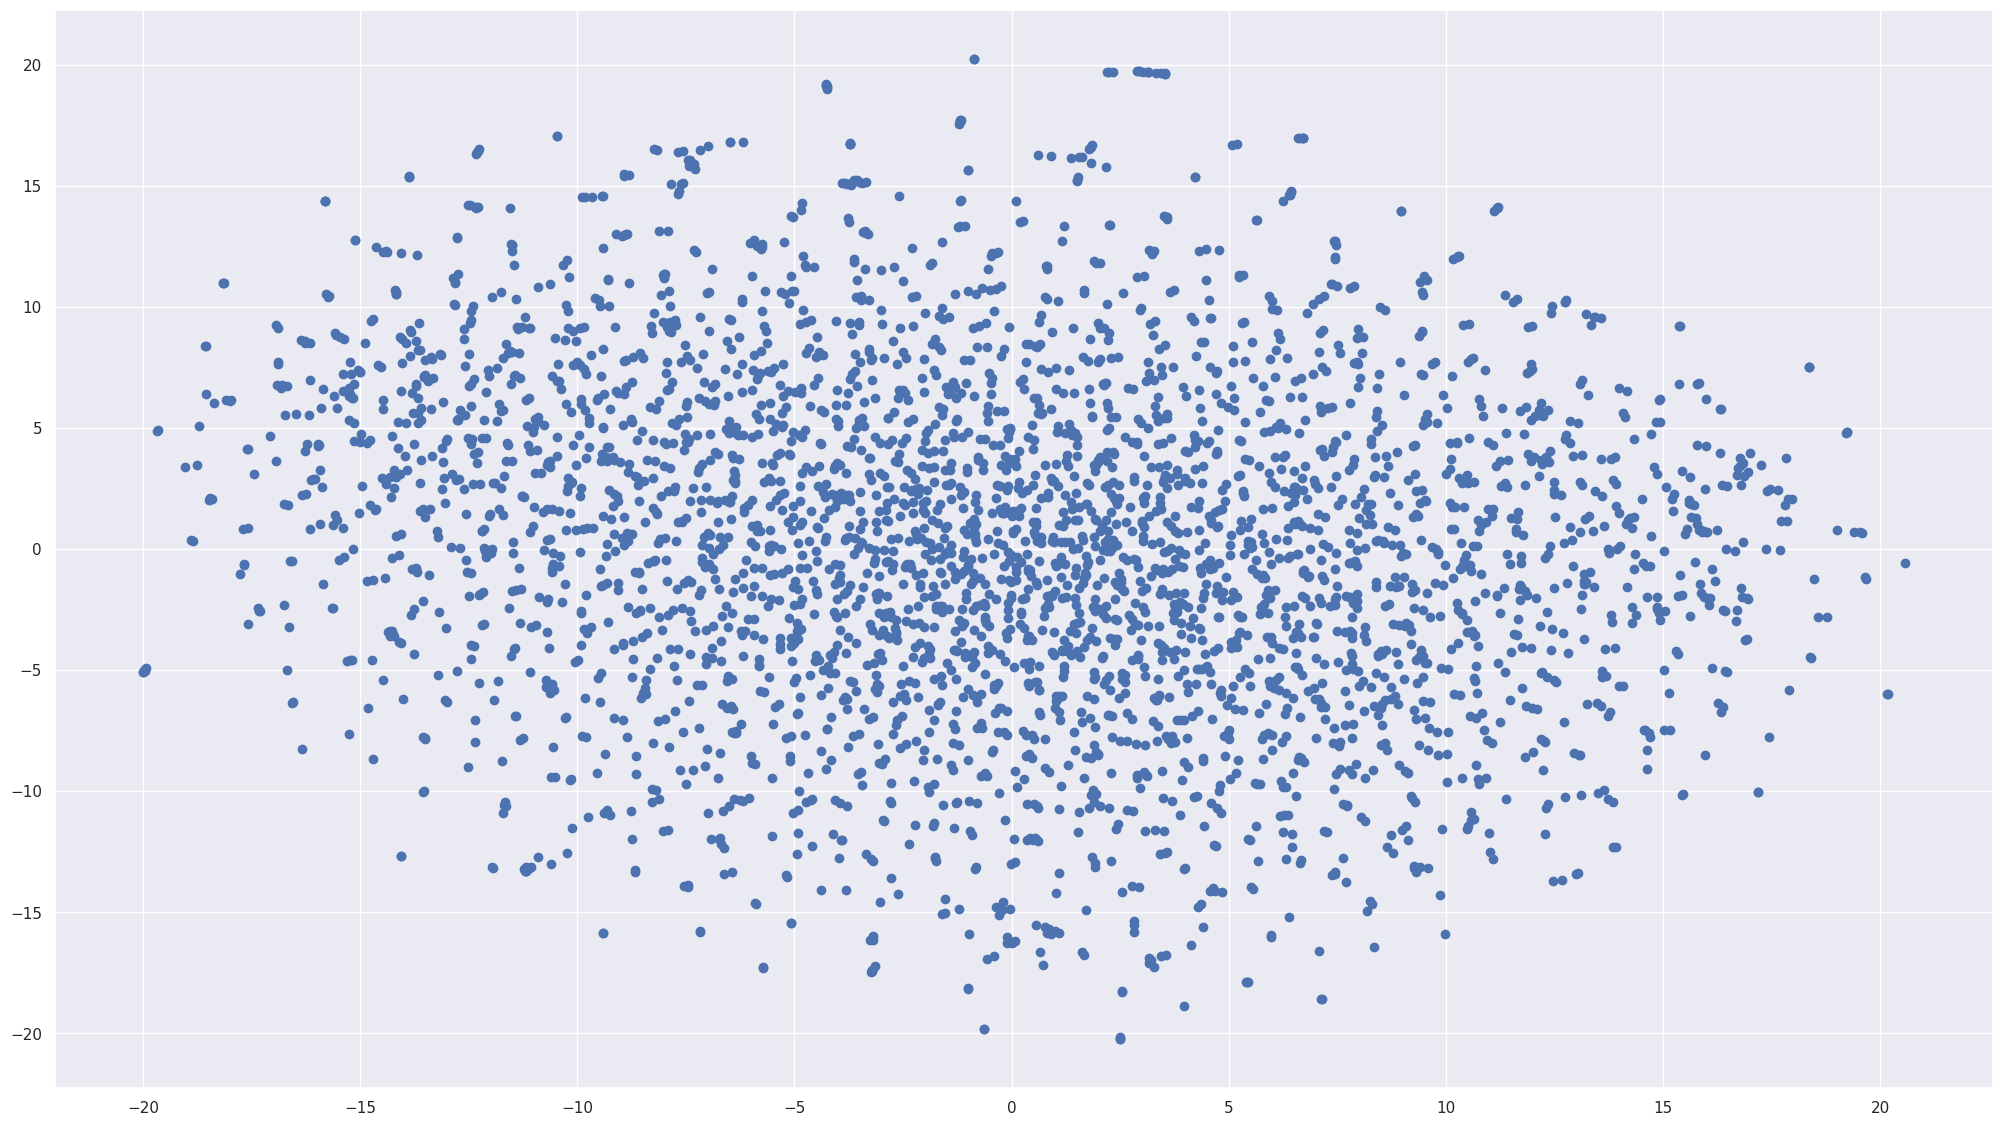

In [ ]:
# Embeddings Visualization

from sklearn.manifold import TSNE

model = SVD()
model.fit(trainset)

# Example with item embeddings
item_embeddings = model.qi
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(item_embeddings)

# Plot
plt.figure(figsize=(25, 14))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.show()



*  Data set shows a circular patters, where similar movies are closer to each other




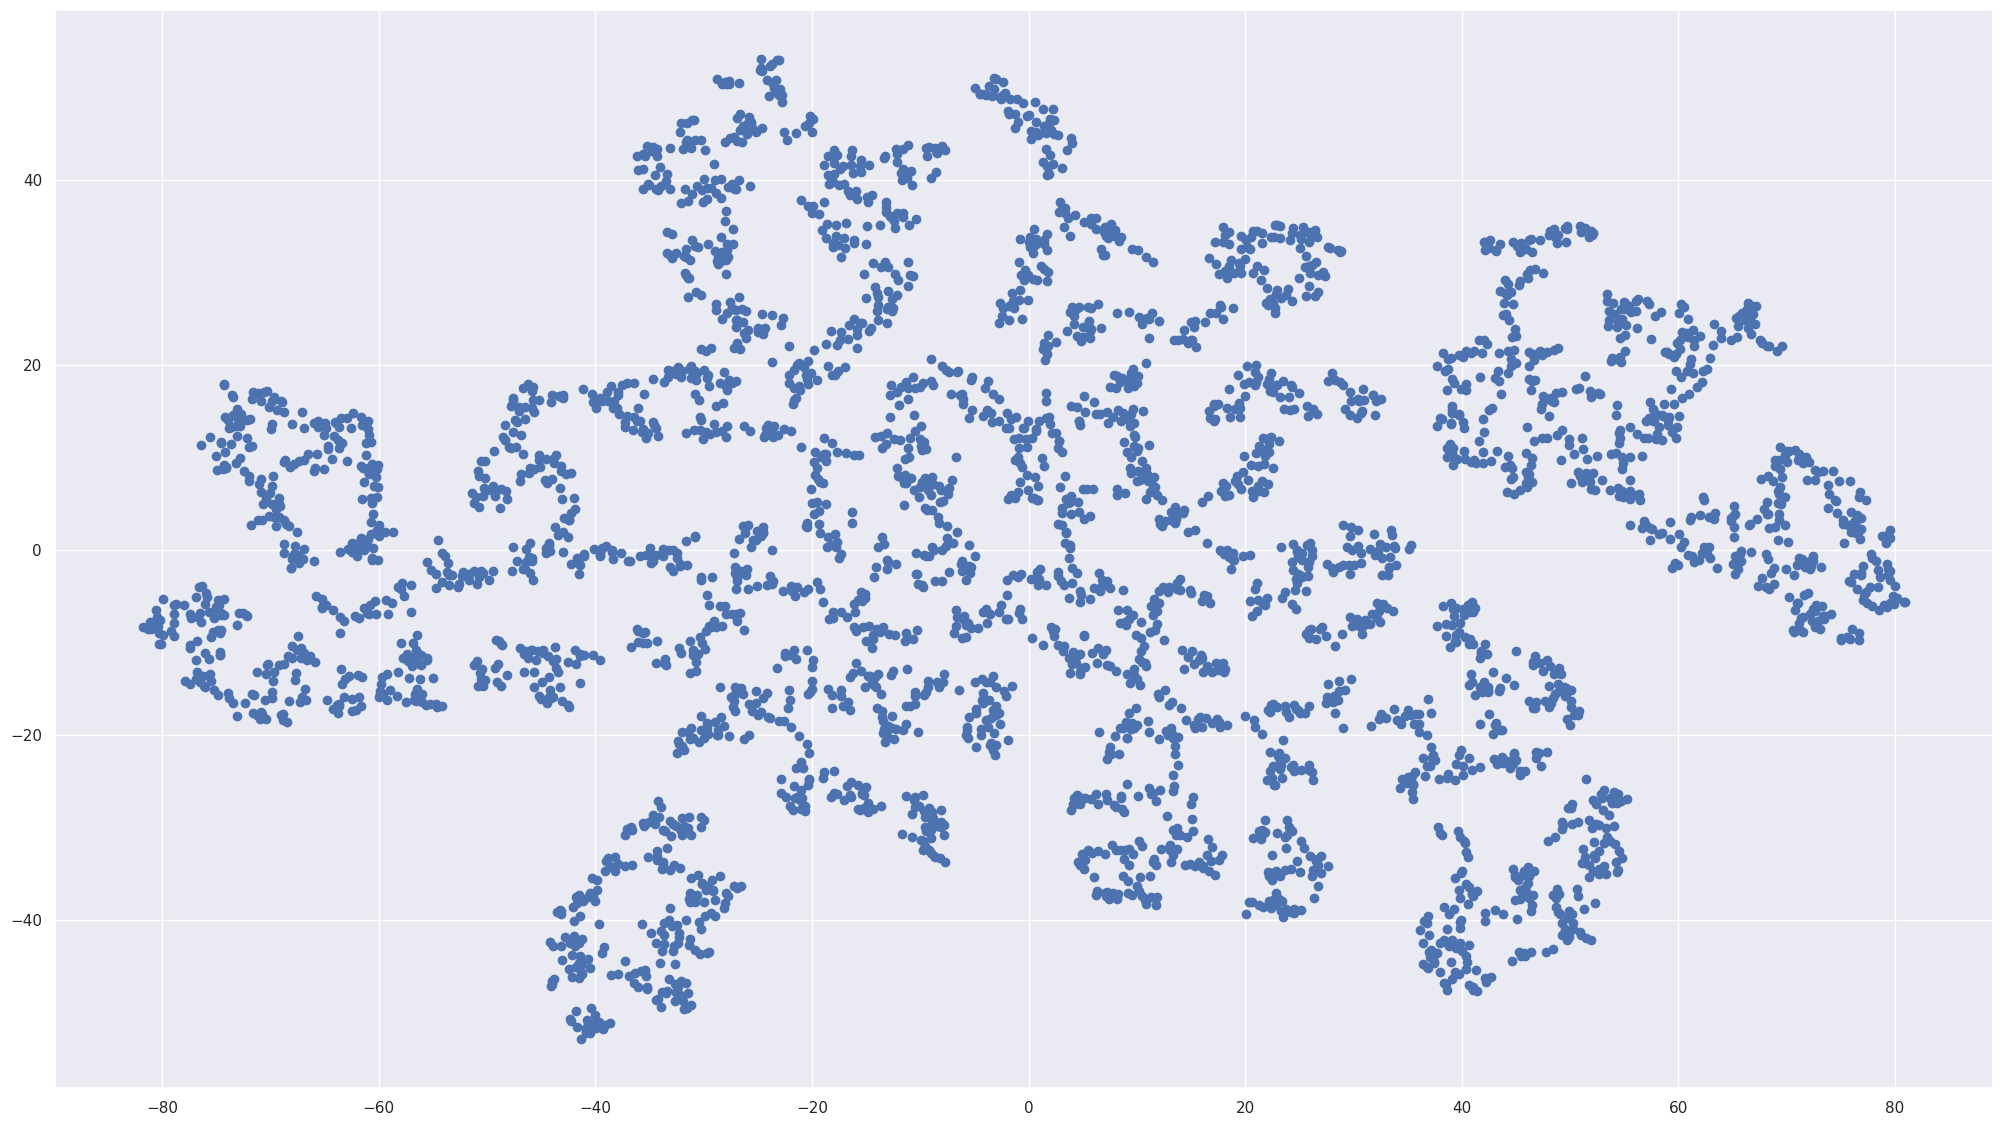

In [ ]:
# Embeddings Visualization with 2 Factors

from sklearn.manifold import TSNE

model = SVD(n_factors=2)
model.fit(trainset)

# Example with item embeddings
item_embeddings = model.qi
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(item_embeddings)

# Plot
plt.figure(figsize=(25, 14))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.show()



*   Embeddings with factors = 2 shows some cluster formation
*   Items closer to the proximity indicates similarity





User Based Approach

In [ ]:
# Creating User Dataframe
df_user = df_merged.copy()

In [ ]:
# Getting New User Input
new_user_ratings = {'MovieID': [1, 5, 20], 'Rating': [4, 5, 3]}
new_user_df = pd.DataFrame(new_user_ratings)

In [ ]:
# Add new user with a unique UserID
new_user_df['UserID'] = df_user['UserID'].max() + 1
df_extended = pd.concat([df_user, new_user_df])

# Create a pivot table
pivot_table = df_extended.pivot_table(index='MovieID', columns='UserID', values='Rating')

In [ ]:
# Compute Pearson Correlation
user_similarity = pivot_table.corr(method='pearson')

# Find top 100 similar users
similar_users = user_similarity[df_extended['UserID'].max()].dropna().sort_values(ascending=False)[1:101]

In [ ]:
# Weighted Ratings
weighted_ratings = pivot_table.T.copy()
for user in similar_users.index:
    weighted_ratings.loc[user] = weighted_ratings.loc[user] *  similar_users[user]

In [ ]:
# Top 10 movies
recommended_movies = weighted_ratings.sum(axis=0) / similar_users.sum()
top_movies = recommended_movies.sort_values(ascending=False)[:10]

In [ ]:
# Display Top Movies
top_movies

,0
MovieID,
2858,175.880271
260,158.053877
1196,152.318612
1210,137.570938
2028,136.531729
1198,133.437080
593,133.086923
2571,132.603727
2762,128.460121


**Insights & Recommendations Insights Genre Preferences:**

*   Drama and Comedy are universally popular, while Action is notably favored by male audiences. This trend suggests distinct preferences in movie genres among different genders. The high popularity of Drama could point to a general preference for content that offers emotional depth and storytelling. Demographic Trends:

*   Individuals in the "25-34" age bracket and those identified as College/Grad students are particularly active in movie watching and rating. This suggests these demographics are either more engaged with the platform or have more free time for movie viewing. Gender Disparity:

*  A notable majority of movie ratings come from male users, indicating a possible gender imbalance. This trend could reflect the user base of the platform or general movie-rating behavior. Temporal Trends:
*   A large number of movies from the 1990s in the dataset may indicate a preference for this era, possibly driven by nostalgia or the enduring appeal of these movies. Popularity Metrics:

*   The analysis shows 'The Shawshank Redemption' and 'Wild Wild West' as the highest and lowest-rated movies, respectively, when considering a Bayesian Weighted Ratio. This approach offers a balanced perspective, taking into account both the average rating and the number of ratings. Recommendations Personalized Genre Recommendations:

*   Leverage the clear preferences for specific genres to personalize recommendations. For example, users who frequently watch dramas should receive more drama-focused suggestions. Targeted Marketing Strategies:

*   Focus marketing efforts on the 25-34 age group and College/Grad students, as they are the most active segments in terms of movie watching and rating. Gender Diversification in Content:

*   Develop strategies to attract a more gender-diverse audience. This could involve promoting movies and content that cater to the preferences of female and non-binary users. Decade-Specific Recommendations:

*   Introduce a feature that allows users to discover movies by decade, tapping into the popularity of 90s films and possibly appealing to nostalgia. Enhanced Data Collection:

*   To address the male skew in your user base, make efforts to gather more data from female and non-binary users. This will help create a more balanced dataset and improve the accuracy and inclusiveness of recommendations.







